<a href="https://colab.research.google.com/github/qnhhoa/MachineLearning/blob/main/Linear_Regression_(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doc du lieu 

In [ ]:
import pandas as pd

data = pd.read_csv('drive/My Drive/public_dataset/housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
type(data)

pandas.core.frame.DataFrame

# Mo ta so luoc ve du lieu

In [ ]:
# Mo ta so luoc ve data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
len(data)

20640

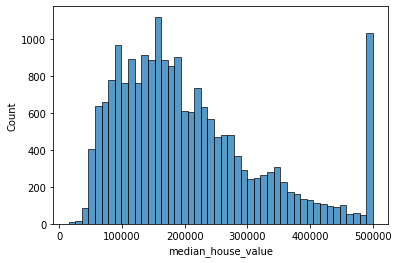

In [ ]:
import seaborn as sns

sns.histplot(data['median_house_value'])

# Xet moi tuong quan giua cac thuoc tinh 

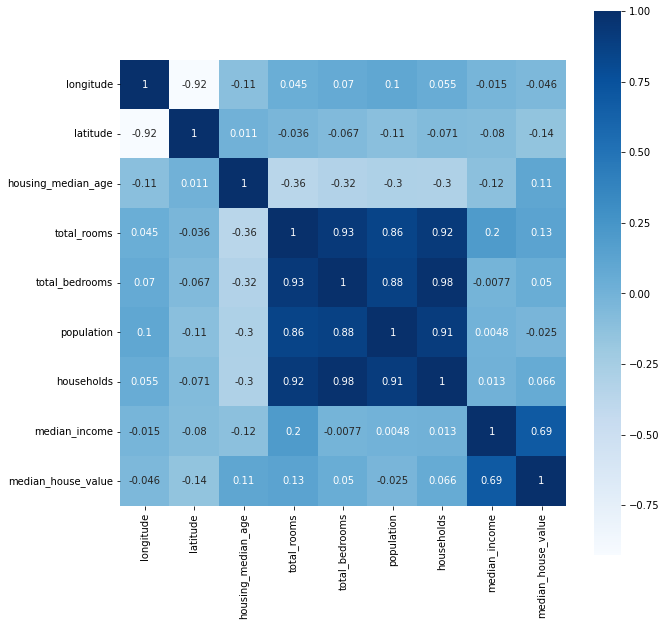

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# tinh su phu thuoc cua tung thuoc tinh

correlation = data.corr(method='pearson')

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

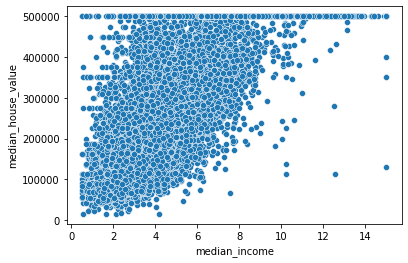

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data, x="median_income", y="median_house_value")

# Xay dung mo hinh

## Chuan bi du lieu 

In [ ]:
# Lay thuoc tinh median_income va median_house_value
X = data['median_income']
y = data['median_house_value']

In [ ]:
# Phan chia du lieu 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Chuan hoa du lieu 
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 50))

y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

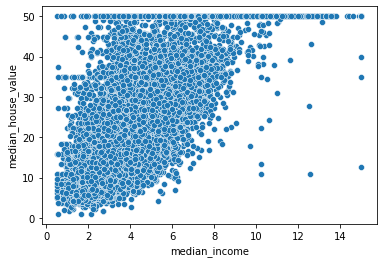

In [ ]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data, x="median_income", y="median_house_value")

## Huan luyen va du doan

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train.shape

(16512,)

In [ ]:
y_train_transformed.shape

(16512,)

In [ ]:
# Du doan ket qua tren tap test 
y_pred = model.predict(X_test.values.reshape(-1,1))

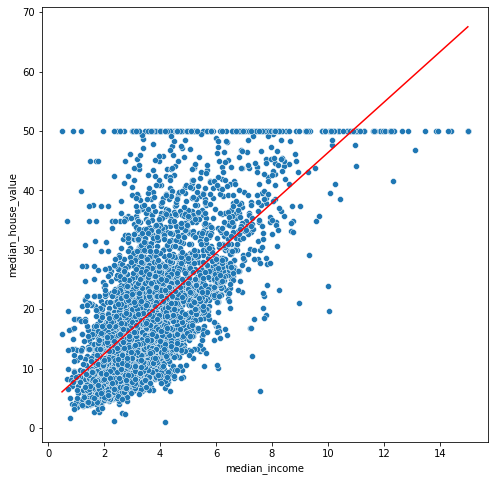

In [ ]:
import seaborn as sns

# truc quan hoa ket qua du doan va ket qua that 

test_true = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_pred})

fig= plt.figure(figsize=(8,8))

# ket qua du doan cua mo hinh (duong thang)
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')

# ket qua thuc su (scatter plot)
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_transformed, y_pred, squared=False)

8.507679573059661

# Cross validation

In [ ]:
# Lay thuoc tinh alcohol va quality
X = data['median_income']
y = data['median_house_value']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [ ]:
len(y_transformed)

16512

In [ ]:
len(X)

16512

In [ ]:
print(kf.split(X, y_transformed))

<generator object BaseShuffleSplit.split at 0x7f6744854bd0>


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1,1)
    y_train = y_transformed[train_index]

    X_test = X.values[test_index].reshape(-1,1)
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)
    
    # Lưu lại kết quả từng fold vào avg_mse 
    avg_mse.append(result)

In [ ]:
# Lay gia tri trung binh cua 5 lan 
import numpy as np

np.mean(np.array(avg_mse))

87.60758800244562

## Du doan cho thuoc tinh Total bedrooms

In [ ]:
# Liet ke cac thuoc tinh null 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
X = data['total_bedrooms']
y = data['median_house_value']

In [ ]:
# Xu ly cho thuoc tinh Null
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_processed = imp.fit_transform(X.values.reshape(-1,1))